In [1]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# === 1. データ読み込み ===
file_path = "Dataset_Simulated_Price_swaption.xlsx"
df = pd.read_excel(file_path)

target_col = "Tenor : 1; Maturity : 0.0833333333333333"
df.columns = df.columns.str.strip()
y = df[target_col].values

# === 2. 特徴量作成 ===
# 時系列のインデックスをそのまま時間として扱う
X = np.arange(len(y)).reshape(-1, 1)

In [3]:
# === 3. 学習・テスト分割 ===
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# === 4. カーネル定義 ===
# 周期性＋ノイズを考慮
kernel = ExpSineSquared(length_scale=20.0, periodicity=100.0) + WhiteKernel(noise_level=0.1)

# === 5. ガウス過程回帰モデル ===
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True)
gp.fit(X_train, y_train)

/opt/anaconda3/envs/qiskit_env/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 0 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


,kernel,ExpSineSquare...ise_level=0.1)
,alpha,1e-10
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,5
,normalize_y,True
,copy_X_train,True
,n_targets,None
,random_state,None
,kernel__k1,ExpSineSquare...riodicity=100)
,kernel__k2,WhiteKernel(noise_level=0.1)
,kernel__k1__length_scale,20.0


In [4]:
# === 6. 予測 ===
y_pred, y_std = gp.predict(X_test, return_std=True)

# === 7. 評価 ===
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.6f}")
print(f"学習後のカーネル: {gp.kernel_}")

RMSE: 0.005731
学習後のカーネル: ExpSineSquared(length_scale=0.0839, periodicity=406) + WhiteKernel(noise_level=0.0302)


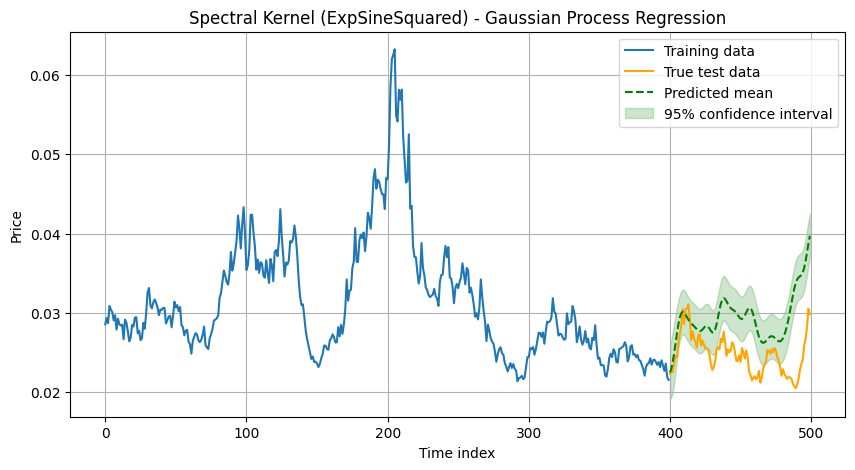

In [5]:
# === 8. 可視化 ===
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, label="Training data")
plt.plot(X_test, y_test, label="True test data", color="orange")
plt.plot(X_test, y_pred, label="Predicted mean", linestyle="--", color="green")
plt.fill_between(
    X_test.ravel(),
    y_pred - 1.96 * y_std,
    y_pred + 1.96 * y_std,
    color="green", alpha=0.2, label="95% confidence interval"
)
plt.title("Spectral Kernel (ExpSineSquared) - Gaussian Process Regression")
plt.xlabel("Time index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
